In [1]:
import os ,shutil,pathlib

In [30]:
pip install opencv-python

     |████████████████████████████████| 60.5 MB 87 kB/s s eta 0:00:01    |█████████████████████████████▎  | 55.4 MB 27.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import os
import cv2
#tesor fow & keras
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2     
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D,GlobalMaxPooling2D
from tensorflow.keras.applications import  Xception,VGG16,InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#cnn
from tensorflow.keras import datasets, layers, models

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.engine.base_layer import Layer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_and_dogs_small")


In [3]:
def make_subset(subset_name,start_index,end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
        for i in range(start_index, end_index)]
        for fname in fnames:
         shutil.copyfile(src=original_dir / fname,
          dst=dir / fname)
  



In [4]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileExistsError: [Errno 17] File exists: 'cats_and_dogs_small/train/cat'

In [5]:
import pandas as pd


In [11]:
from tensorflow import keras 
from tensorflow.keras import layers

In [7]:
inputs = keras.Input(shape=(180, 180, 3))
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters= 32,kernel_size= 3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size= 2)(x)
x = layers.Conv2D(filters= 64,kernel_size= 3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size= 2)(x)
x = layers.Conv2D(filters= 128,kernel_size= 3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size= 2)(x)
x = layers.Conv2D(filters= 256,kernel_size= 3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size= 2)(x)
x = layers.Conv2D(filters= 256,kernel_size= 3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)




In [7]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(new_base_dir / "train",image_size=(180,180),batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation",image_size=(180,180),batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test",image_size=(180,180),batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print(data_batch.shape, labels_batch.shape)
    break

(32, 180, 180, 3) (32,)


In [10]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch.keras",
save_best_only=True,
monitor="val_loss")]

In [11]:
history = model.fit(
train_dataset,
epochs=100,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 9s 107ms/step - loss: 0.7153 - accuracy: 0.5020 - val_loss: 0.6916 - val_accuracy: 0.5260
Epoch 2/100
63/63 [==============================] - 6s 97ms/step - loss: 0.6888 - accuracy: 0.5695 - val_loss: 0.6656 - val_accuracy: 0.5960
Epoch 3/100
63/63 [==============================] - 6s 97ms/step - loss: 0.6605 - accuracy: 0.6090 - val_loss: 0.6294 - val_accuracy: 0.6270
Epoch 4/100
63/63 [==============================] - 6s 97ms/step - loss: 0.6185 - accuracy: 0.6760 - val_loss: 0.6225 - val_accuracy: 0.6360
Epoch 5/100
63/63 [==============================] - 6s 96ms/step - loss: 0.5803 - accuracy: 0.6845 - val_loss: 0.5883 - val_accuracy: 0.6990
Epoch 6/100
63/63 [==============================] - 6s 97ms/step - loss: 0.5718 - accuracy: 0.7180 - val_loss: 0.5870 - val_accuracy: 0.6910
Epoch 7/100
63/63 [==============================] - 6s 96ms/step - loss: 0.5106 - accuracy: 0.7570 - val_loss: 0.5896 - val_accuracy: 0.6700
Epoch

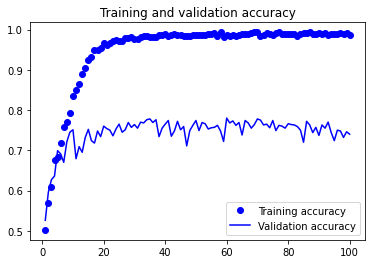

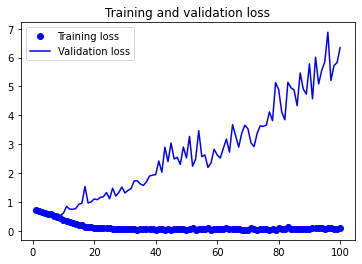

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [13]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 34ms/step - loss: 0.5565 - accuracy: 0.7455
Test accuracy: 0.746


conv_base


In [7]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False
#for layer in conv_base.layers[:-4]:
    #layer.trainable = False


In [16]:
#conv_base.trainable = True
print("This is the number of trainable weights "
"before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [17]:
conv_base.trainable = False
print("This is the number of trainable weights "
"after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [19]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)

In [20]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [11]:
model.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics=["accuracy"])

In [21]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="fine_tuning.keras",
save_best_only=True,
monitor="val_loss")]

In [22]:
history = model.fit(
train_dataset,
epochs=30,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 27s 380ms/step - loss: 19.2019 - accuracy: 0.8980 - val_loss: 3.7692 - val_accuracy: 0.9670
Epoch 2/30
63/63 [==============================] - 21s 336ms/step - loss: 6.8581 - accuracy: 0.9485 - val_loss: 6.0301 - val_accuracy: 0.9680
Epoch 3/30
63/63 [==============================] - 21s 335ms/step - loss: 6.8326 - accuracy: 0.9525 - val_loss: 3.7879 - val_accuracy: 0.9720
Epoch 4/30
63/63 [==============================] - 21s 337ms/step - loss: 5.6806 - accuracy: 0.9630 - val_loss: 3.7780 - val_accuracy: 0.9770
Epoch 5/30
63/63 [==============================] - 21s 338ms/step - loss: 3.9818 - accuracy: 0.9660 - val_loss: 4.0718 - val_accuracy: 0.9750
Epoch 6/30
63/63 [==============================] - 21s 338ms/step - loss: 3.3070 - accuracy: 0.9685 - val_loss: 4.3592 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 22s 348ms/step - loss: 3.6622 - accuracy: 0.9710 - val_loss: 3.3990 - val_accuracy: 0.977

In [23]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 14s 216ms/step - loss: 2.3238 - accuracy: 0.9740
Test accuracy: 0.974


PART 2: Convolutional Neural Network



In [13]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
 layer.trainable = False

In [14]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)

In [15]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [16]:
model.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics=["accuracy"])

In [17]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="fine_tuning.keras",
save_best_only=True,
monitor="val_loss")
]

In [18]:
history = model.fit(
train_dataset,
epochs=30,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 31s 423ms/step - loss: 4.0332 - accuracy: 0.7325 - val_loss: 0.7644 - val_accuracy: 0.9210
Epoch 2/30
63/63 [==============================] - 24s 383ms/step - loss: 1.2205 - accuracy: 0.8620 - val_loss: 0.4177 - val_accuracy: 0.9540
Epoch 3/30
63/63 [==============================] - 24s 390ms/step - loss: 0.7216 - accuracy: 0.8985 - val_loss: 0.2809 - val_accuracy: 0.9620
Epoch 4/30
63/63 [==============================] - 24s 378ms/step - loss: 0.4825 - accuracy: 0.9165 - val_loss: 0.2246 - val_accuracy: 0.9630
Epoch 5/30
63/63 [==============================] - 24s 376ms/step - loss: 0.3174 - accuracy: 0.9345 - val_loss: 0.1926 - val_accuracy: 0.9700
Epoch 6/30
63/63 [==============================] - 23s 363ms/step - loss: 0.2913 - accuracy: 0.9420 - val_loss: 0.1907 - val_accuracy: 0.9680
Epoch 7/30
63/63 [==============================] - 23s 366ms/step - loss: 0.2229 - accuracy: 0.9495 - val_loss: 0.1858 - val_accuracy: 0.9720

In [19]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 13s 207ms/step - loss: 0.1390 - accuracy: 0.9680
Test accuracy: 0.968


In [20]:
import numpy as np
batch_size=32

In [24]:
predict = model.predict(test_dataset)

In [25]:
predict

array([[2.0551446e-05],
       [9.0227542e-14],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [5.3633266e-15],
       [1.0000000e+00]], dtype=float32)

In [26]:
np.argmax(predict,axis=1)[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
def plot_predection(model_name):
    plt.figure(figsize=(20,15))
    plt.suptitle("Predection  Images", fontsize=20)
    images = [] 
    path ='cats_and_dogs_small/test'
    count = 0  #val_images,val_labels
    for i,files in enumerate(os.listdir(path)) :
        img = plt.imread(path)
        img = cv2.resize(img,(128,128))
        plt.imshow(img,cmap=plt.cm.binary)
        img = np.expand_dims(img, axis=0)
        feature = model_name.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.subplot(5,7,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel("Predicted"+get_Label(int(predection)))
        count += 1
        if count == 34 :
            break                
